In [1]:
import numpy as np
from scipy.signal import convolve2d as conv2
import matplotlib.pyplot as plt

from skimage import color, data, restoration
import deconv as d
import metrics as m

#astro = color.rgb2gray(data.page())
astro = data.page() / 255

np.random.seed(seed=0)

psf = np.identity(7)
psf = psf/np.sum(psf)
astro_blurred = conv2(astro, psf, 'same')

astro_noisy = astro_blurred.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.
astro_noisy = np.clip(astro_noisy, 0, 1)

### Richardson-Lucy

In [20]:
rich = d.richardson_lucy(astro, astro_noisy, psf)
rich.fit(m.histogram, step_after = 10)

Наилучший параметр: 26
Наименьшая ошибка:  0.46741265441604213


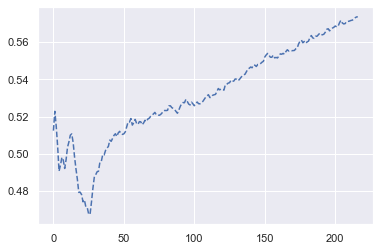

In [21]:
rich.debug_graph()

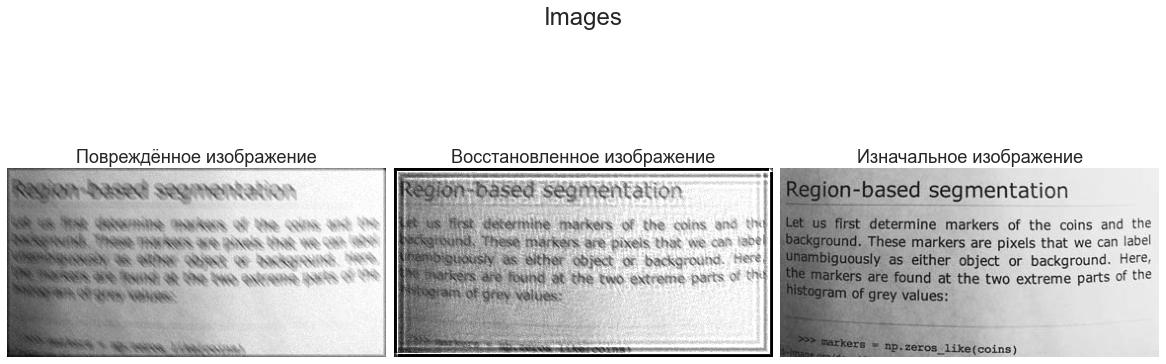

In [22]:
rich.plot3imgs()

### Wiener

In [26]:
wiener = d.wiener(astro, astro_noisy, psf)
wiener.bruteforce(m.histogram, irange=(0, 2))

Наилучший параметр: 0.08
Наименьшая ошибка:  0.3669438456010677


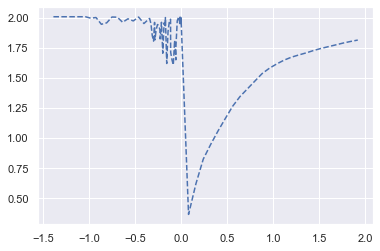

In [27]:
wiener.debug_graph()

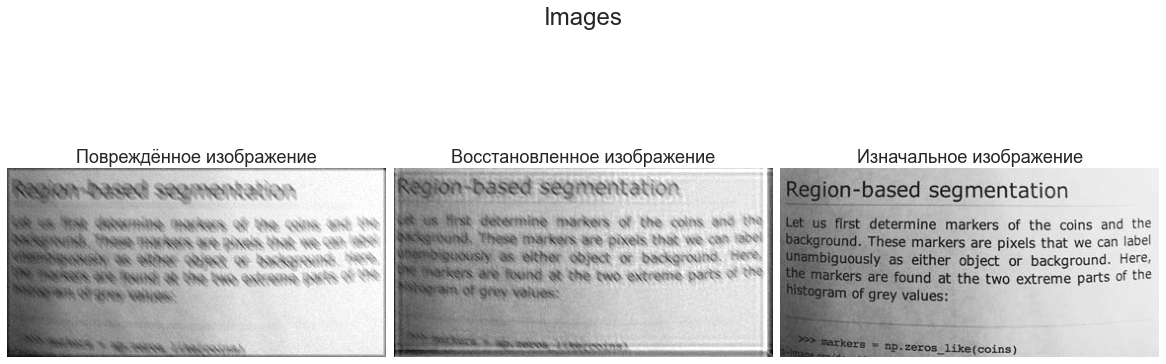

In [28]:
wiener.plot3imgs()

### Tykhonov

In [29]:
tykhonov = d.tykhonov(astro, astro_noisy, psf)
tykhonov.bruteforce(m.histogram, irange=(0, 5))

Наилучший параметр: 0.0018254114909489116
Наименьшая ошибка:  0.46505834445471034


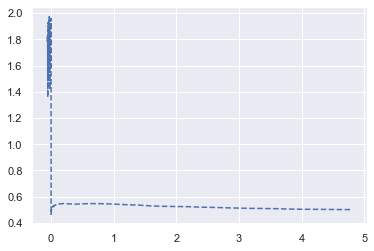

In [30]:
tykhonov.debug_graph()

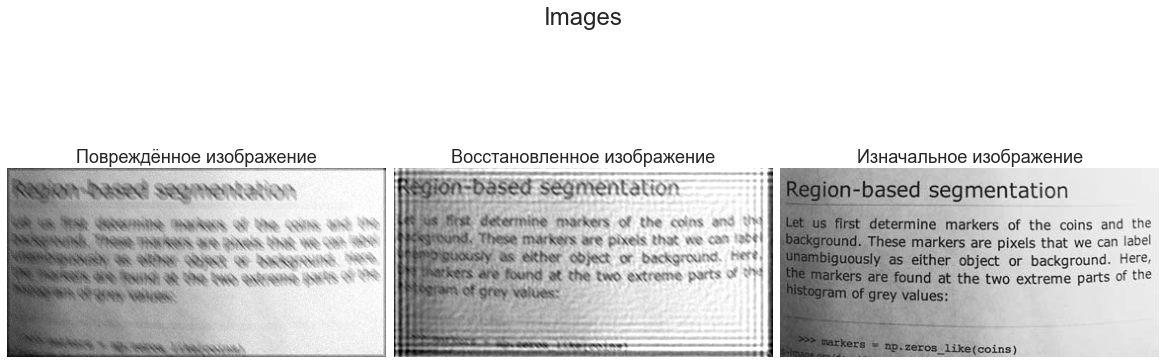

In [31]:
tykhonov.plot3imgs()